# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [130]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [4]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

## Deliverable 1: Get a Summary DataFrame 

In [16]:
#  1. Get the total rides for each city type

sum_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [35]:
print(sum_rides_by_city_type)

125

In [ ]:
sum_rides_by_city_type("urban")

In [20]:
# 2. Get the total drivers for each city type

sum_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_city_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [ ]:
pyber_summary_df = pd.merge(sum_drivers_by_city_type, sum_fare_by_city_type, how="left", on=["city", "city"])

In [34]:
#  3. Get the total amount of fares for each city type
sum_fare_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fare_by_city_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [ ]:
#total fares for all cities 

In [23]:
#  4. Get the average fare per ride for each city type. 
average_fares = sum_fare_by_city_type/sum_rides_by_city_type
average_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [24]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = sum_fare_by_city_type/sum_drivers_by_city_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [22]:
sum_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [32]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.merge(sum_drivers_by_city_type, sum_fare_by_city_type,  on=["type", "type"])
pyber_summary_df

,,driver_count,fare
type,type,,
Rural,Rural,78,4327.93
Suburban,Suburban,490,19356.33
Urban,Urban,2405,39854.38


In [ ]:
data={"rides", sum_rides_by_city_type, "Avg per driver", average_fare_per_driver}

df = pd.concat(data,
               axis = 1)

In [41]:
sum_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [52]:
summary_df = pd.DataFrame()

In [53]:
summary_df["Total Rides"]=sum_rides_by_city_type
summary_df

,Total Rides
type,
Rural,125
Suburban,625
Urban,1625


In [54]:
summary_df["Total Drivers"]=sum_drivers_by_city_type
summary_df

,Total Rides,Total Drivers
type,,
Rural,125,78
Suburban,625,490
Urban,1625,2405


In [55]:
summary_df["Total Fares"]=sum_fare_by_city_type
summary_df

,Total Rides,Total Drivers,Total Fares
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [56]:
summary_df["Total Fares"]=average_fares
summary_df

,Total Rides,Total Drivers,Total Fares
type,,,
Rural,125,78,34.623440
Suburban,625,490,30.970128
Urban,1625,2405,24.525772


In [57]:
summary_df["Average Fare per Driver"]=average_fares
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Driver
type,,,,
Rural,125,78,34.623440,34.623440
Suburban,625,490,30.970128,30.970128
Urban,1625,2405,24.525772,24.525772


In [58]:
summary_df["Average per Driver"]=average_fare_per_driver
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Driver,Average per Driver
type,,,,,
Rural,125,78,34.623440,34.623440,55.486282
Suburban,625,490,30.970128,30.970128,39.502714
Urban,1625,2405,24.525772,24.525772,16.571468


In [63]:
summary_df.rename(columns = {'Average Fare per Driver':'Average Fare per Ride', 'Average per Driver':'Average Fare per Driver'}, inplace = True)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,34.623440,34.623440,55.486282
Suburban,625,490,30.970128,30.970128,39.502714
Urban,1625,2405,24.525772,24.525772,16.571468


In [126]:
summary_df["Total Rides"]

Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [65]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,34.623440,34.623440,55.486282
Suburban,625,490,30.970128,30.970128,39.502714
Urban,1625,2405,24.525772,24.525772,16.571468


In [67]:
# making a copy of the df for formatting 
pyber_summary_df=summary_df
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,34.623440,34.623440,55.486282
Suburban,625,490,30.970128,30.970128,39.502714
Urban,1625,2405,24.525772,24.525772,16.571468


In [69]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$34.62,$34.62,$55.49
Suburban,625,490,$30.97,$30.97,$39.50
Urban,1625,2405,$24.53,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [71]:
# 1. Read the merged DataFrame
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,$13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,$33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,$23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,$34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,$13.38,8550365057598,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,$20.76,9018727594352,2,Rural
2372,North Jaime,2/10/2019 21:03,$11.11,2781339863778,1,Rural
2373,West Heather,5/7/2019 19:22,$44.94,4256853490277,4,Rural


In [84]:
pd.options.display.float_format = '{:,.2f}'.format

In [131]:
dual_index_df = pyber_data_df.groupby(["date", "type"]).sum()
dual_index_df

,,fare,ride_id,driver_count
date,type,,,
1/1/2019 0:08,Urban,37.91,5673666505216,69
1/1/2019 0:46,Suburban,47.74,2215912677020,23
1/1/2019 12:32,Suburban,25.56,2613536554411,1
1/1/2019 14:40,Urban,5.42,5676167585855,46
1/1/2019 14:42,Urban,12.31,4757042711529,45
...,...,...,...,...
5/8/2019 1:54,Urban,32.69,1643407853276,25
5/8/2019 2:31,Urban,41.33,5688921852912,4
5/8/2019 4:20,Urban,21.99,117997692054,52


In [122]:
dual_index_df.describe()

,fare,ride_id,driver_count
count,"2,364.00","2,364.00","2,364.00"
mean,26.88,"4,910,010,755,911.24",29.06
std,12.26,"2,942,677,583,174.28",20.98
min,4.05,"321,833,677.00",1.00
25%,17.21,"2,383,632,824,557.75",11.00
50%,26.67,"4,750,455,819,031.50",23.00
75%,36.78,"7,482,027,550,859.00",45.00
max,68.61,"17,523,613,089,033.00",132.00


In [129]:
dual_index_df['urban'][1/1/2019 14:42]

SyntaxError: invalid syntax (Temp/ipykernel_18832/2923483066.py, line 1)

In [137]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
dual_index_df = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]
dual_index_df.head(10)



,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
1/1/2019 14:52,Suburban,31.15
1/1/2019 17:22,Urban,42.11
1/1/2019 21:04,Urban,11.71
1/1/2019 2:07,Suburban,24.07


In [138]:
dual_index_df2 = dual_index_df
dual_index_df2


,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
...,...,...
5/8/2019 1:54,Urban,32.69
5/8/2019 2:31,Urban,41.33
5/8/2019 4:20,Urban,21.99


In [139]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
dual_index_df2 = dual_index_df2.reset_index()
dual_index_df2


,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [118]:
dual_index_df2 = dual_index_df2.reset_index()
dual_index_df2

,index,type,date,fare,ride_id,driver_count
0,0,Rural,1/1/2019 9:45,43.69,2424875833354,1
1,1,Rural,1/11/2019 4:39,16.42,8800556719157,6
2,2,Rural,1/14/2019 15:58,54.10,432925983890,6
3,3,Rural,1/14/2019 7:09,18.05,5405362355006,1
4,4,Rural,1/15/2019 21:44,30.26,3837056996776,1
...,...,...,...,...,...,...
2359,2359,Urban,5/8/2019 1:54,32.69,1643407853276,25
2360,2360,Urban,5/8/2019 2:31,41.33,5688921852912,4
2361,2361,Urban,5/8/2019 4:20,21.99,117997692054,52
2362,2362,Urban,5/8/2019 4:39,18.45,1811574736337,11


In [150]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

df3 = dual_index_df2.pivot(index='date', columns='type', values='fare')
df3


type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2361 entries, 1/1/2019 0:08 to 5/8/2019 7:29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 138.3+ KB


In [155]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df3.loc['2019-01-01 0:00':'2019-04-28 23:59']




type,Rural,Suburban,Urban
date,,,


In [142]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
dual_index_df2.index =pd.to_datetime(dual_index_df2.index)
dual_index_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2364 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002363
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2364 non-null   object 
 1   type    2364 non-null   object 
 2   fare    2364 non-null   float64
dtypes: float64(1), object(2)
memory usage: 73.9+ KB


In [143]:
dual_index_df2.index 

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000002354',
               '1970-01-01 00:00:00.000002355',
               '1970-01-01 00:00:00.000002356',
               '1970-01-01 00:00:00.000002357',
               '1970-01-01 00:00:00.000002358',
               '1970-01-01 00:00:00.000002359',
               '1970-01-01 00:00:00.000002360',
               '1970-01-01 00:00:00.000002361',
               '1970-01-01 00:00:00.000002362',
               '1970-01-01 00:00:00.000002363'],
              dtype=

In [157]:
df3.index

Index(['1/1/2019 0:08', '1/1/2019 0:46', '1/1/2019 12:32', '1/1/2019 14:40',
       '1/1/2019 14:42', '1/1/2019 14:52', '1/1/2019 17:22', '1/1/2019 21:04',
       '1/1/2019 2:07', '1/1/2019 3:46',
       ...
       '5/7/2019 5:55', '5/7/2019 7:08', '5/7/2019 8:47', '5/8/2019 11:38',
       '5/8/2019 13:10', '5/8/2019 1:54', '5/8/2019 2:31', '5/8/2019 4:20',
       '5/8/2019 4:39', '5/8/2019 7:29'],
      dtype='object', name='date', length=2361)

In [162]:
df4 = df3.loc['1/1/2019':'4/28/2019']
df4

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/27/2019 6:02,38.33,NaN,NaN
4/27/2019 6:20,NaN,28.29,NaN
4/27/2019 7:18,NaN,18.56,NaN


In [163]:
df4.index

Index(['1/1/2019 0:08', '1/1/2019 0:46', '1/1/2019 12:32', '1/1/2019 14:40',
       '1/1/2019 14:42', '1/1/2019 14:52', '1/1/2019 17:22', '1/1/2019 21:04',
       '1/1/2019 2:07', '1/1/2019 3:46',
       ...
       '4/27/2019 20:41', '4/27/2019 23:26', '4/27/2019 23:52',
       '4/27/2019 2:28', '4/27/2019 5:31', '4/27/2019 6:02', '4/27/2019 6:20',
       '4/27/2019 7:18', '4/27/2019 7:34', '4/27/2019 8:48'],
      dtype='object', name='date', length=2038)

In [164]:
# 7. Check that the datatype for the index is datetime using df.info()
df4.index =pd.to_datetime(df4.index)


In [165]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2038 entries, 2019-01-01 00:08:00 to 2019-04-27 08:48:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  532 non-null    float64
 2   Urban     1403 non-null   float64
dtypes: float64(3)
memory usage: 63.7 KB


In [167]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

df5 = df4.resample('W').sum()
df5


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,"1,661.68"
2019-01-13,67.65,"1,105.13","2,050.43"
2019-01-20,306.00,"1,218.20","1,939.02"
2019-01-27,179.69,"1,203.28","2,129.51"
2019-02-03,333.08,"1,042.79","2,086.94"
2019-02-10,115.80,974.34,"2,162.64"
2019-02-17,95.82,"1,045.50","2,235.07"
2019-02-24,419.06,"1,412.74","2,466.29"
2019-03-03,175.14,858.46,"2,218.20"


<AxesSubplot:xlabel='date'>

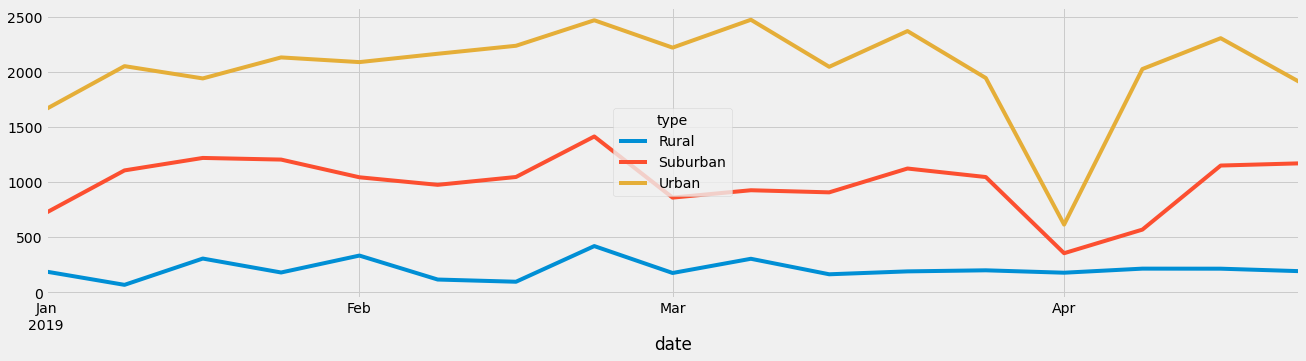

In [176]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
df5.plot(figsize=(20,5))

